# California house ML prediction
#### by Lorenzo Bussotti

The aim of this project was to develop a procedure for a first data analysis, and then to the definition of multiple machine learning models for the prediction of median Californian-house value. In this regards, I am going to use 5 specific models such as linear regression, decision tree, random forest, K-nearest neighbors and support vector regressor, which finally will be compared among one another to find the best.

In [1]:
#supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [27]:
#importing dataset
ch = pd.read_csv('housing.csv')
ch.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Dataset: 
- longitude <br>
- latitude <br>
- housing median age <br>
- total rooms number <br>
- total bedrooms number <br>
- population 
- households <br>
- median income <br>
- median house value --> target feature! <br>
- ocean proximity (the only categorical feature)

###### It's a regression problem!

In [28]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [29]:
ch.isnull().sum() # total bedrooms has missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

##### Descripive statistics<br>

The table shows how only 'housing median age' and 'median income' has similar mean and median which can lead to think their distribution may be close to gaussian-type: I'll verify it lately with distribution visualization.

Nicely, we can see how big is the difference between the minimum median-house-value (14999) and its maximum (500001).

In [30]:
ch.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### Treat missing values

Since the number of missing values is about 1% on the total I will not eliminate the whole columns, which would be deleted whereas missing values >30%, due to huge amount of loss information. <br>
On the contrary, I am going to check the 'total bedroom' distribution in order to verify the possible skewness and subsequently, treat those missing values. <br>


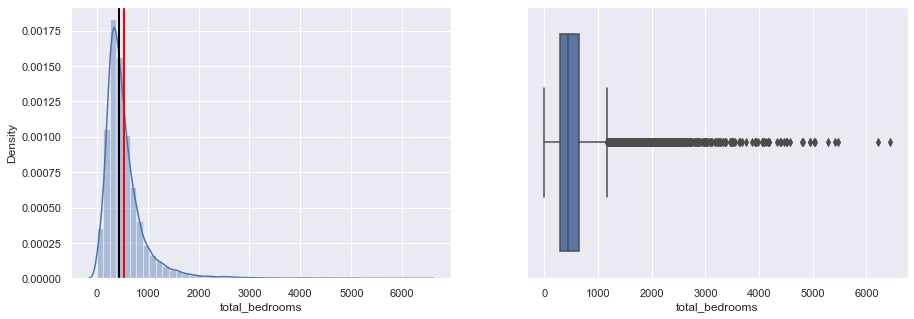

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.distplot(ch.total_bedrooms, ax=axs[0])
sns.boxplot(ch.total_bedrooms, ax=axs[1])
axs[0].axvline(x=ch['total_bedrooms'].mean(), linewidth=2, color="red") #red line to show the mean
axs[0].axvline(x=ch['total_bedrooms'].median(), linewidth=2, color="black")#black line to show the median
plt.show()

Since the distribution is right skewed, I opted to replace the missing values with the median. 

In [28]:
#fixing data null with median
ch['total_bedrooms'].fillna(value=ch['total_bedrooms'].median(), inplace=True)
ch.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

##### Distribution visualization

Let's perform a visual exploratory data analysis in order to discover the distribution of continuous features. <br>
'Median income' distribution is the one most similar to the target 'median house value' distribution.

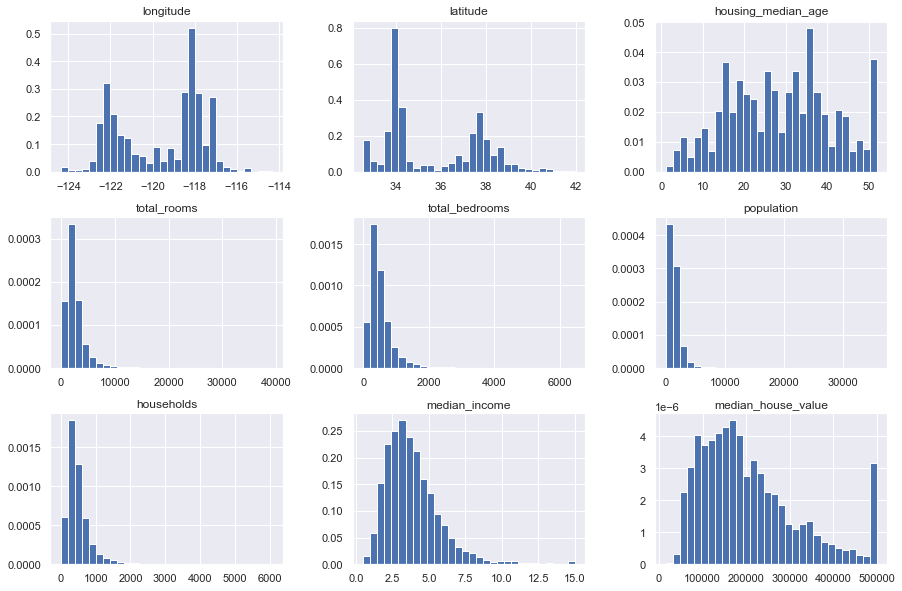

In [14]:
ch.hist(bins=30, figsize=(15, 10), density=True)
plt.show()

##### Correlation matrix: continuous variable vs continuous variable

Now, let's evaluate the correlation among continuous features! <br>
The greater correlation with the variable target is showed by 'median income', previously indicated with similar distribution to the target.


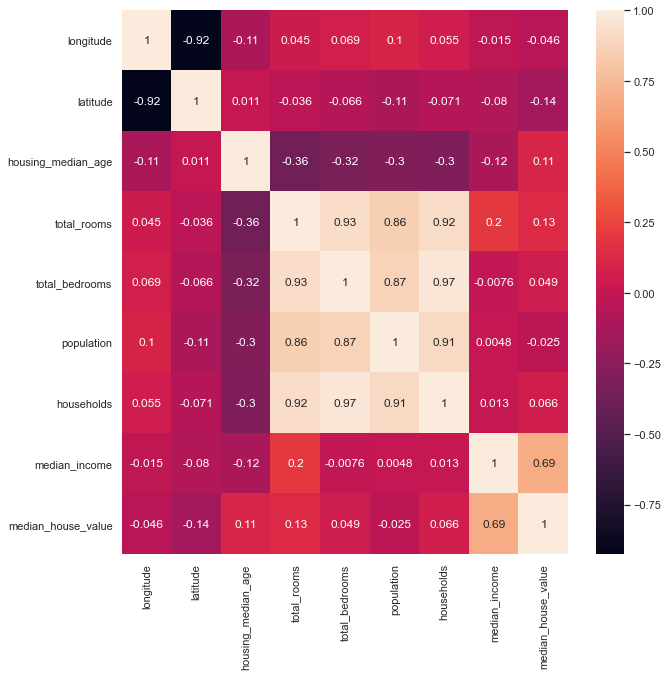

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(ch.corr(), annot=True)
plt.show()

##### Checking the categorical variable

Then, control the categorical feature 'ocean proximity' to understand the frequency for each category!

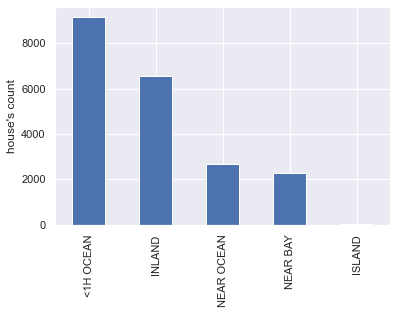

In [52]:
ch['ocean_proximity'].value_counts().plot(kind='bar', ylabel="house's count") #count values of 'ocean_proximity'
plt.show()

Since that one-hour proximity houses are those with highest frequency, let's show whether the highest median-value houses are situated near the ocean.  <br>
Down below, I plotted the house examples using the coordinates and hence, the graph can be interpreted as geographical-kind (different size of spots indicates the related population). The figure shows how the median value roughly increase in the proximity of Pacific Ocean.


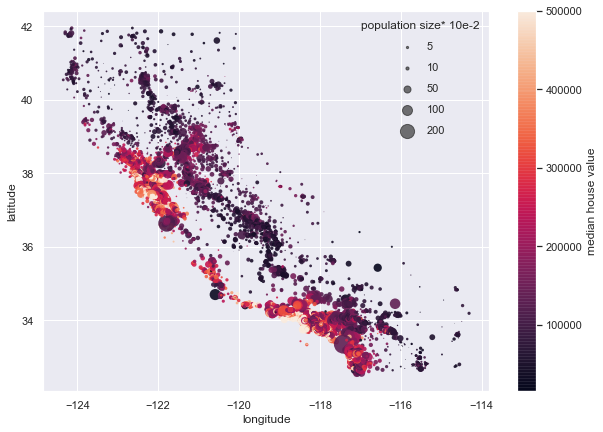

In [53]:
lat, lon = ch['latitude'], ch['longitude']
mhv = ch['median_house_value']
# Scatter the points, using size and color but no label
plt.figure(figsize=(10,7))
plt.scatter(
    lon, lat, 
    c=mhv, 
    s=ch['population']/100, 
    linewidth=0, alpha=0.9,
)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='median house value')

for pop in [5, 10, 50, 100, 200]:
    plt.scatter([], [],  alpha=0.6, s=pop,
                label=str(pop), c='k')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, title='population size* 10e-2')
plt.show()

##### Boxplot: categorical variable vs continuous variable

Let's see if ocean proximity has effect on the target: <br>
if the distribution is different for each category, it suggests that these variables might be correlated with median house value.<br>

In this case, the categorical predictor looks correlated with the target variable.

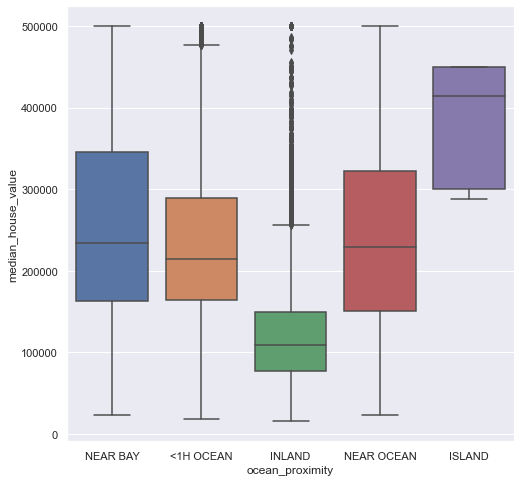

In [22]:
# Box plots for the Target Variable "median_house_value" and categorical predictor "ocean_proximity"
plt.figure(figsize=(8,8))
sns.boxplot('ocean_proximity','median_house_value', data=ch)
plt.show()

###### Sklearn modules import and data (categorical) preprocessing

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import  KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Let's encode 'ocean proximity' as numerical, using Label Encoder function from sklearn preprocessing module

In [29]:
numbers = LabelEncoder()
ch['ocean_proximity'] = numbers.fit_transform(ch['ocean_proximity'].astype(str))
ch

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


##### Splitting data 

In [30]:
#separating data
X = ch.drop('median_house_value', axis=1)
y = ch.median_house_value

#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

First, train models that don't need data to scale

##### Linear Regression  

In [43]:
#linear regressor object and fitting data
reg_linear = LinearRegression()
reg_linear.fit(X_train,y_train)

#prediction with test set
pred_linear = reg_linear.predict(X_test)

# measuring goodness of fit in Training data
linear_train_score = r2_score(y_train, reg_linear.predict(X_train))
print('R2 Value on train data: %.2f' % linear_train_score)

#MSE
linear_mse = mean_squared_error(y_test, pred_linear)
print('mean absolute error: %.2f' %linear_mse)

# measuring goodness of fit in Testing data
linear_score = r2_score(y_test, pred_linear)
print('R2 on test set: %.2f' %linear_score)

R2 Value on train data: 0.64
mean absolute error: 4859698119.21
R2 on test set: 0.63


##### Decision Tree

In [32]:
#defining parameters for decision tree regressor
params= {
    'max_depth': [2,4,6,8,10,12], #depth of the tree
    'min_samples_split':np.arange(2, 20),
    'min_samples_leaf':np.arange(2, 10)
}

#create decision tree object and the cross validated regressor
reg_tree = DecisionTreeRegressor()
gs = GridSearchCV(reg_tree, params, cv=5, n_jobs=-1) 

#fitting training set
gs.fit(X_train, y_train) 

#printing best estimator values
reg_tree = gs.best_params_
print(reg_tree,'\n') 

#prediction with test data
pred_tree = gs.predict(X_test)

# measuring goodness of fit in Training data
dt_score_train = r2_score(y_train, gs.predict(X_train))
print('R2 Value on train data: %.2f' %dt_score_train)

#MSE
dt_mse = mean_squared_error(y_test, pred_tree)
print('Mean Squared Error: %.2f' %dt_mse)

#printing scores
dt_score = r2_score(y_test, pred_tree)
print('R2 on test set: %.2f' %dt_score)


{'max_depth': 12, 'min_samples_leaf': 9, 'min_samples_split': 9} 

R2 Value on train data: 0.85
Mean Squared Error: 3433008283.07
R2 on test set: 0.74


##### Random Forest

In [46]:
#define dictionary with model's hyperparameters
params = {
    'n_estimators':[50], #with 100 and 500 don't change and process is so long
    'max_depth': np.arange(2,12),
    'min_samples_leaf': np.arange(2,12),
    'max_features': [None] #Empirical good default values are None (considering all features instead of a random subset)
}

#create random forest object and the cross validated regressor
reg_forest = RandomForestRegressor()
gs = GridSearchCV(reg_forest,params, cv=5, n_jobs=-1) #validation for Random Forest

#fit the data
gs.fit(X_train, y_train)

#make the prediction with test data
pred_forest = gs.predict(X_test)

# measuring goodness of fit in Training data
rf_score_train = r2_score(y_train, gs.predict(X_train))
print('R2 Value on train data: %.2f' %rf_score_train)

#MSE
rf_mse = mean_squared_error(y_test, pred_forest)
print('Mean Squared Error: %.2f' %rf_mse)

# measuring goodness of fit in test data
rf_score = r2_score(y_test, pred_forest) 
print('R2 on test set: %.2f' %rf_score)

R2 Value on train data: 0.88
Mean Squared Error: 2750632633.80
R2 on test set: 0.79


##### Data scaling

In [34]:
#since our distribution aren't mainly gaussian, I opted for standardization instead of normalization
#scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

##### KNN

In [39]:
#define dictionary with model's hyperparameters
params_KNN = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

#create K-nearest neighbors object and the cross validated regressor
KNN = KNeighborsRegressor()  
gs = GridSearchCV(KNN, params_KNN, cv=5)

#fit the data
gs.fit(X_train, y_train)

#print best parameters
h = gs.best_params_
print(h, '\n')

# make predictions with testing set
pred_KNN = gs.predict(X_test)

# measuring goodness of fit in Training data
knn_score_train = r2_score(y_train, gs.predict(X_train))
print('R2 Value on train data: %.2f' %knn_score_train)

#MSE
knn_mse = mean_squared_error(y_test, pred_KNN)
print('Mean Squared Error: %.2f' %knn_mse)

# measuring goodness of fit in Test data
knn_score = r2_score(y_test, pred_KNN) 
print('R2 on test set: %.2f' %knn_score)

{'n_neighbors': 11, 'weights': 'distance'} 

R2 Value on train data: 1.00
Mean Squared Error: 3582002294.99
R2 on test set: 0.73


##### SVR

In [36]:
reg_svr = SVR(kernel='linear', C=500)  #due to slowness of this model I tried to set the hyperparameters manually 
reg_svr.fit (X_train, y_train)

# measuring goodness of fit in Training data
svr_score_train = r2_score(y_train, reg_svr.predict(X_train))
print('R2 Value on train data: %.2f' %svr_score_train)

#make the prediction with test data
pred_svr = reg_svr.predict(X_test)

#MSE
svr_mse = mean_squared_error(y_test, pred_svr)
print('Mean Squared Error: %.2f' %svr_mse)

# measuring goodness of fit in Test data
svr_score = r2_score(y_test, pred_svr)
print('R2 score in test set: %.2f' %svr_score)


R2 Value on train data: 0.62
Mean Squared Error: 5077014527.59
R2 score in test set: 0.61


##### Comparison among models

Lastly, let's built a table to compare the models to find that fit data the best! <br>
In this case, the best model appears to be the ensamble Random Forest regressor.

In [47]:
final_data = [[linear_score, linear_mse], [dt_score, dt_mse ], [rf_score, rf_mse],  [knn_score, knn_mse], [svr_score, svr_mse]]
index = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'KNN Regression','SVR Regressor']
pd.DataFrame(final_data, index=index, columns=['R2 score', 'MSE']).sort_values('R2 score',ascending = False)

,R2 score,MSE
Random Forest Regressor,0.790434,2.750633e+09
Decision Tree Regressor,0.738445,3.433008e+09
KNN Regression,0.727094,3.582002e+09
Linear Regression,0.629749,4.859698e+09
SVR Regressor,0.613192,5.077015e+09
